In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
import random

# data

In [2]:
data_1d = pd.read_csv('RegData.csv', header=None)
X_1d = data_1d[0]
y_1d = data_1d[1]

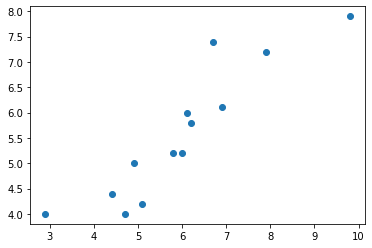

In [3]:
plt.scatter(X_1d, y_1d)
plt.show()

In [4]:
data_2d = pd.read_csv('MultipleLR.csv', header=None)
X_2d= data_2d.iloc[:,:-1]
y_2d = data_2d.iloc[:,-1:]

# batch

## Gradient Descent

In [5]:
def Gradient_Descent(X, y, n_iters, theta_0=0, theta_1=0, learning_rate=0.001):
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta_0, theta_1 = theta_0, theta_1
    learning_rate = learning_rate
    MSE_list = []
    for i in range(0, n_iters):
        #Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
        h_theta = theta_0 + theta_1*X

        #Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).
        m = len(X)
        MSE = (1/(2*m))* sum((h_theta - y)**2)
        MSE_list.append(MSE)
        #Step4: Calculate the gradient.
        drev_theta0 = (1/m) * sum(h_theta - y)
        drev_theta1 = (1/m) * sum( (h_theta - y)* X)

        #Step5: Update the parameters (simultaneously).
        theta_0 = theta_0 - learning_rate*drev_theta0
        theta_1 = theta_1 - learning_rate*drev_theta1

        #Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        #stop condition 1
        if (i>0) and (np.abs(MSE_list[-2] - MSE_list[-1]) < 0.00001):
            break
           
        #stop condition 2
        theta_vector = [drev_theta0, drev_theta1]
        gradient = np.linalg.norm(theta_vector)
        if i > 0 and gradient < 0.3:
            break
        
    return theta_0, theta_1, MSE_list

In [6]:
theta_0, theta_1, error_list = Gradient_Descent(X_1d, y_1d, 500, 0, 0, 0.001)

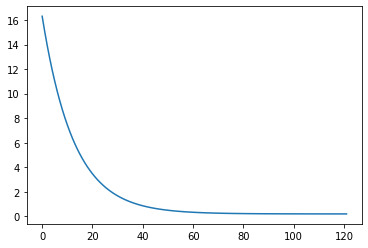

In [7]:
plt.plot(error_list);

In [8]:
h_theta = theta_0 + theta_1*X_1d

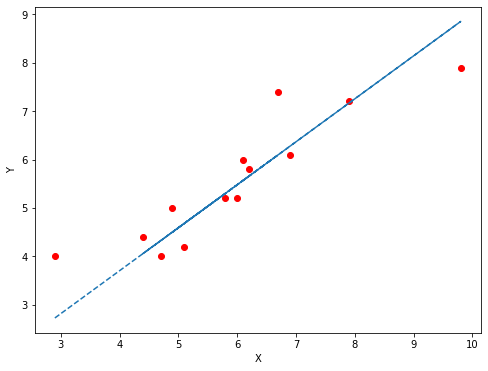

In [9]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X_1d, y_1d, marker='o', color='red')
plt.plot(X_1d, h_theta, linestyle='dashed')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## momentum + batch

In [10]:
def Momentum_Batch(X, y, n_iters, learning_rate=0.001, gamma=0.9):
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta_0, theta_1 = 0, 0
    v_theta0, v_theta1  = 0, 0
    learning_rate = learning_rate
    gamma = gamma
    
    m = len(X)
    MSE_list = []
    for i in range(0, n_iters):
        #Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
        h_theta = theta_0 + theta_1*X
        
        #Step4: Calculate the gradient.
        drev_theta0 = (1/m) * sum(h_theta - y)
        drev_theta1 = (1/m) * sum( (h_theta - y)* X)

        #Step5: Update the parameters (simultaneously).
        v_theta0 = gamma*v_theta0 + learning_rate*drev_theta0
        v_theta1 = gamma*v_theta1 + learning_rate*drev_theta1
        
        theta_0 = theta_0 - v_theta0
        theta_1 = theta_1 - v_theta1

        #Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        
        #Calculate Cost function 𝑱(theta_0,theta_1 ).
        m = len(X)
        MSE = (1/(2*m))* sum((h_theta - y)**2)
        MSE_list.append(MSE)
        #stop condition 1
        if (i>0) and (np.abs(MSE_list[-2] - MSE_list[-1]) < 0.00001):
            break
           
        #stop condition 2
        theta_vector = [drev_theta0, drev_theta1]
        gradient = np.linalg.norm(theta_vector)
        if i > 0 and gradient < 0.3:
            break
        
    return theta_0, theta_1, MSE_list

In [11]:
theta_0, theta_1, error_list = Momentum_Batch(X_1d, y_1d, 1000, 0.001, 0.9)

In [12]:
h_theta = theta_0 + theta_1*X_1d

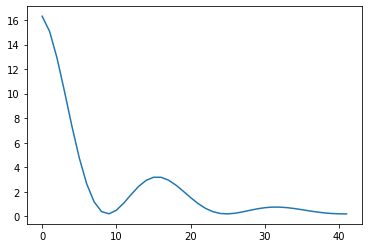

In [13]:
plt.plot(error_list);

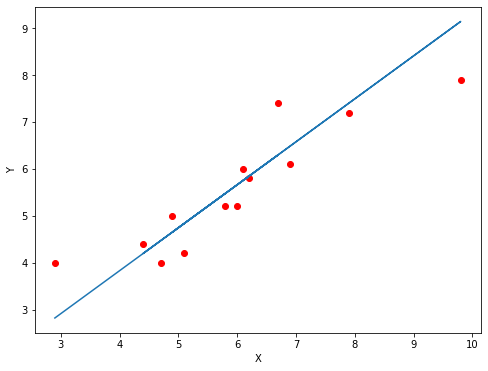

In [14]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X_1d, y_1d, marker='o', color='red')
plt.plot(X_1d, h_theta)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## batch + NAG

In [15]:
def NAG_Batch(X, y, n_iters, learning_rate=0.001, gamma=0.9):
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta_0, theta_1 = 0, 0
    v_theta0, v_theta1  = 0, 0
    theta_temp0, theta_temp1 = 0, 0
    
    learning_rate = learning_rate
    gamma = gamma
    
    m = len(X)
    MSE_list = []
    for i in range(0, n_iters):
        #look ahead step
        theta_temp0 = theta_0 - gamma*v_theta0
        theta_temp1 = theta_1 - gamma*v_theta1
      
        h_theta = theta_temp0 + theta_temp1*X
        #Step4: Calculate the gradient at new point based on momentum.
        drev_theta_temp0 = (1/m) * sum(h_theta - y)
        drev_theta_temp1 = (1/m) * sum( (h_theta - y)* X)

        #Step5: Update the parameters (simultaneously).
        theta_0 = theta_temp0 - learning_rate*drev_theta_temp0
        theta_1 = theta_temp1 - learning_rate*drev_theta_temp1
    
        v_theta0 = gamma*v_theta0 + learning_rate*drev_theta_temp0
        v_theta1 = gamma*v_theta1 + learning_rate*drev_theta_temp1

        #Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        
        #Calculate Cost function 𝑱(theta_0,theta_1 ).
        h_theta = theta_0 + theta_1*X
        MSE = (1/(2*m))* sum((h_theta - y)**2)
        MSE_list.append(MSE)
        #stop condition 1
        if (i>0) and (np.abs(MSE_list[-2] - MSE_list[-1]) < 0.001):
            break
           
        #stop condition 2
        theta_vector = [drev_theta_temp0, drev_theta_temp1]
        gradient = np.linalg.norm(theta_vector)
        if i > 0 and gradient < 0.01:
            break
        
    return theta_0, theta_1, MSE_list

In [16]:
theta_0, theta_1, error_list = NAG_Batch(X_1d, y_1d, 1000, 0.001, 0.9)

In [17]:
h_theta = theta_0 + theta_1*X_1d

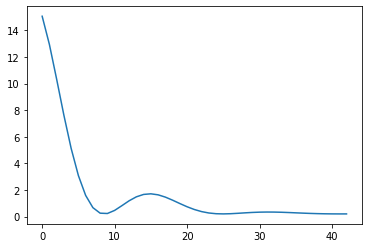

In [18]:
plt.plot(error_list);

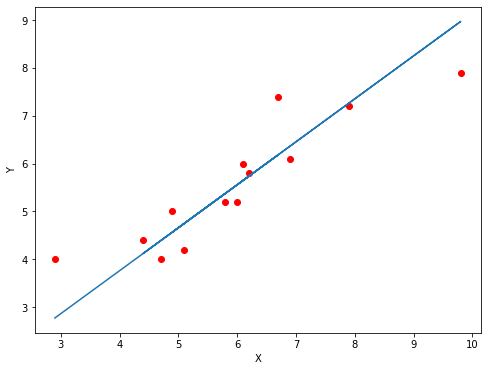

In [19]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X_1d, y_1d, marker='o', color='red')
plt.plot(X_1d, h_theta)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## adagrad + batch

In [20]:
def adagrad_Batch(X, y, n_iters, learning_rate=0.001):
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta_0, theta_1 = 0, 0
    v_theta0, v_theta1  = 0, 0
    epsilon = 10**(-8)
    learning_rate = learning_rate

    m = len(X)
    MSE_list = []
    for i in range(0, n_iters):
      
        h_theta = theta_0 + theta_1*X
        #Step4: Calculate the gradient at new point based on momentum.
        drev_theta0 = (1/m) * sum(h_theta - y)
        drev_theta1 = (1/m) * sum( (h_theta - y)* X)

        #Step5: Update the parameters (simultaneously).
        v_theta0 = v_theta0 + (drev_theta0)**2
        v_theta1 = v_theta1 + (drev_theta1)**2
        
        
        theta_0 = theta_0 - (learning_rate/((v_theta0)**0.5 +epsilon) )*drev_theta0
        theta_1 = theta_1 - (learning_rate/((v_theta1)**0.5 +epsilon) )*drev_theta1


        #Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        
        #Calculate Cost function 𝑱(theta_0,theta_1 ).
        h_theta = theta_0 + theta_1*X
        MSE = (1/(2*m))* sum((h_theta - y)**2)
        MSE_list.append(MSE)
        #stop condition 1
        if (i>0) and (np.abs(MSE_list[-2] - MSE_list[-1]) < 0.001):
            break
           
        #stop condition 2
        theta_vector = [drev_theta0, drev_theta1]
        gradient = np.linalg.norm(theta_vector)
        if i > 0 and gradient < 0.01:
            break
        
    return theta_0, theta_1, MSE_list

In [21]:
theta_0, theta_1, error_list = adagrad_Batch(X_1d, y_1d, 1000, 0.1)
# we need to increase the learning rate as this has a disadvantage of agressively killing the gradient

In [22]:
h_theta = theta_0 + theta_1*X_1d

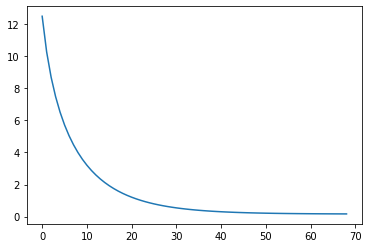

In [23]:
plt.plot(error_list);

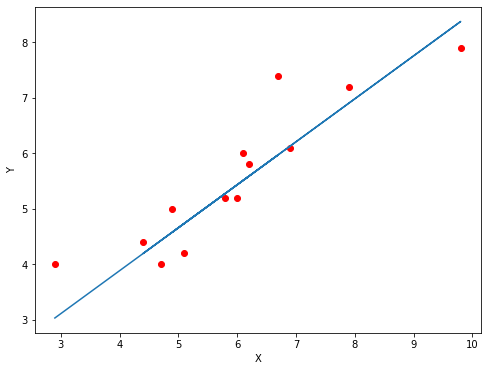

In [24]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X_1d, y_1d, marker='o', color='red')
plt.plot(X_1d, h_theta)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Rmsprop

In [25]:
#solve the problem of killing the learning rate

In [26]:
def Rmsprop_Batch(X, y, n_iters, learning_rate=0.001, beta=0.9):
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta_0, theta_1 = 0, 0
    v_theta0, v_theta1  = 0, 0
    epsilon = 10**(-8)
    learning_rate = learning_rate
    beta = beta
    
    m = len(X)
    MSE_list = []
    for i in range(0, n_iters):
      
        h_theta = theta_0 + theta_1*X
        #Step4: Calculate the gradient at new point based on momentum.
        drev_theta0 = (1/m) * sum(h_theta - y)
        drev_theta1 = (1/m) * sum( (h_theta - y)* X)

        #Step5: Update the parameters (simultaneously).
        v_theta0 = beta*v_theta0 + (1-beta)*(drev_theta0)**2
        v_theta1 = beta*v_theta1 + (1-beta)*(drev_theta1)**2
        
        
        theta_0 = theta_0 - (learning_rate/((v_theta0)**0.5 +epsilon) )*drev_theta0
        theta_1 = theta_1 - (learning_rate/((v_theta1)**0.5 +epsilon) )*drev_theta1


        #Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        
        #Calculate Cost function 𝑱(theta_0,theta_1 ).
        h_theta = theta_0 + theta_1*X
        MSE = (1/(2*m))* sum((h_theta - y)**2)
        MSE_list.append(MSE)

        #stop condition 1
        if (i>0) and (np.abs(MSE_list[-2] - MSE_list[-1]) < 0.0001):
            break
           
        #stop condition 2
        theta_vector = [drev_theta0, drev_theta1]
        gradient = np.linalg.norm(theta_vector)
        if i > 0 and gradient < 0.01:
            break
        
    return theta_0, theta_1, MSE_list

In [27]:
theta_0, theta_1, error_list = Rmsprop_Batch(X_1d, y_1d, 1000, 0.01, 0.9)

In [28]:
h_theta = theta_0 + theta_1*X_1d

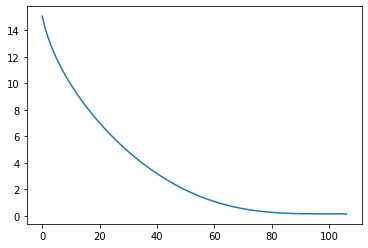

In [29]:
plt.plot(error_list);

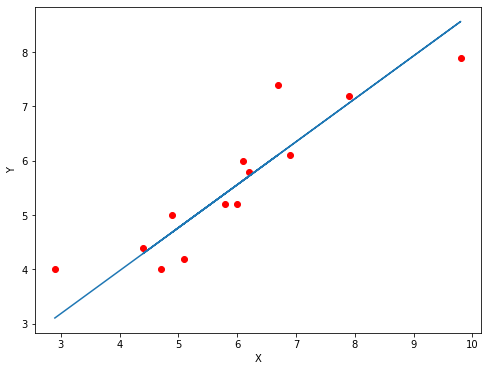

In [30]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X_1d, y_1d, marker='o', color='red')
plt.plot(X_1d, h_theta)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## batch + adam

In [31]:
def adam_Batch(X, y, n_iters, learning_rate=0.001, beta1=0.9, beta2=0.99):
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta_0, theta_1 = 0, 0
    v_theta0, v_theta1  = 0, 0
    m_theta0, m_theta1 = 0, 0
    epsilon = 10**(-8)
    learning_rate = learning_rate
    beta1 = beta1
    beta2 = beta2
    
    m = len(X)
    MSE_list = []
    for i in range(0, n_iters):
      
        h_theta = theta_0 + theta_1*X
        #Step4: Calculate the gradient at new point based on momentum.
        drev_theta0 = (1/m) * sum(h_theta - y)
        drev_theta1 = (1/m) * sum( (h_theta - y)* X)

        #Step5: Update the parameters (simultaneously).
        #momentum
        m_theta0 = beta1*m_theta0 + (1-beta1)*drev_theta0
        m_theta1 = beta1*m_theta1 + (1-beta1)*drev_theta1
        #rms effective learning rate
        #dec learning rate for large gradient
        #inc learning rate for small gradient
        v_theta0 = beta2*v_theta0 + (1-beta2)*(drev_theta0)**2
        v_theta1 = beta2*v_theta1 + (1-beta2)*(drev_theta1)**2
        
        theta_0 = theta_0 - ((learning_rate* m_theta0) / ((v_theta0)**0.5 +epsilon))
        theta_1 = theta_1 - ((learning_rate* m_theta1) / ((v_theta1)**0.5 +epsilon))


        #Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        
        #Calculate Cost function 𝑱(theta_0,theta_1 ).
        h_theta = theta_0 + theta_1*X
        MSE = (1/(2*m))* sum((h_theta - y)**2)
        MSE_list.append(MSE)

        #stop condition 1
        if (i>0) and (np.abs(MSE_list[-2] - MSE_list[-1]) < 0.0001):
            break
           
        #stop condition 2
        theta_vector = [drev_theta0, drev_theta1]
        gradient = np.linalg.norm(theta_vector)
        if i > 0 and gradient < 0.01:
            break
        
    return theta_0, theta_1, MSE_list

In [32]:
theta_0, theta_1, error_list = adam_Batch(X_1d, y_1d, 2000, 0.001, 0.9, 0.99)

In [33]:
h_theta = theta_0 + theta_1*X_1d

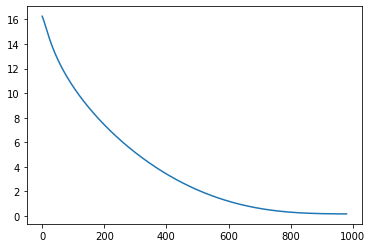

In [34]:
plt.plot(error_list);

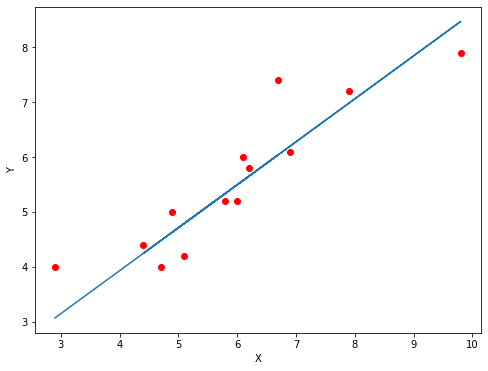

In [35]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X_1d, y_1d, marker='o', color='red')
plt.plot(X_1d, h_theta)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## bias correction

In [36]:
def adam_Batch_biascorr(X, y, n_iters, learning_rate=0.001, beta1=0.9, beta2=0.99):
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta_0, theta_1 = 0, 0
    v_theta0, v_theta1  = 0, 0
    m_theta0, m_theta1 = 0, 0
    epsilon = 10**(-8)
    learning_rate = learning_rate
    beta1 = beta1
    beta2 = beta2
    
    m = len(X)
    MSE_list = []
    for i in range(0, n_iters):
      
        h_theta = theta_0 + theta_1*X
        #Step4: Calculate the gradient at new point based on momentum.
        drev_theta0 = (1/m) * sum(h_theta - y)
        drev_theta1 = (1/m) * sum( (h_theta - y)* X)

        #Step5: Update the parameters (simultaneously).
        #momentum
        m_theta0 = beta1*m_theta0 + (1-beta1)*drev_theta0
        m_theta1 = beta1*m_theta1 + (1-beta1)*drev_theta1
        
        m0_update = m_theta0/(1-beta1**(i+1))
        m1_update = m_theta1/(1-beta1**(i+1))
        
        #rms effective learning rate
        #dec learning rate for large gradient
        #inc learning rate for small gradient
        v_theta0 = beta2*v_theta0 + (1-beta2)*(drev_theta0)**2
        v_theta1 = beta2*v_theta1 + (1-beta2)*(drev_theta1)**2
        
        v0_update = v_theta0/(1-beta2**(i+1))
        v1_update = v_theta1/(1-beta2**(i+1))
        
        theta_0 = theta_0 - ((learning_rate* m0_update) / ((v0_update)**0.5 +epsilon))
        theta_1 = theta_1 - ((learning_rate* m1_update) / ((v1_update)**0.5 +epsilon))


        #Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        
        #Calculate Cost function 𝑱(theta_0,theta_1 ).
        h_theta = theta_0 + theta_1*X
        MSE = (1/(2*m))* sum((h_theta - y)**2)
        MSE_list.append(MSE)

        #stop condition 1
        if (i>0) and (np.abs(MSE_list[-2] - MSE_list[-1]) < 0.000001):
            break
           
        #stop condition 2
        theta_vector = [drev_theta0, drev_theta1]
        gradient = np.linalg.norm(theta_vector)
        if i > 0 and gradient < 0.0001:
            break
        
    return theta_0, theta_1, MSE_list

In [37]:
theta_0, theta_1, error_list = adam_Batch_biascorr(X_1d, y_1d, 10000, 0.001, 0.9, 0.99)

In [38]:
h_theta = theta_0 + theta_1*X_1d

In [39]:
r2_score(y_1d, h_theta)

0.8212557062252392

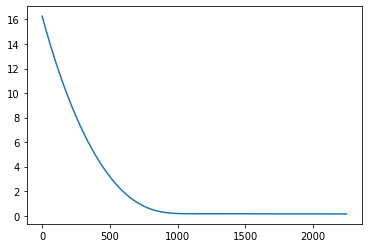

In [40]:
plt.plot(error_list);

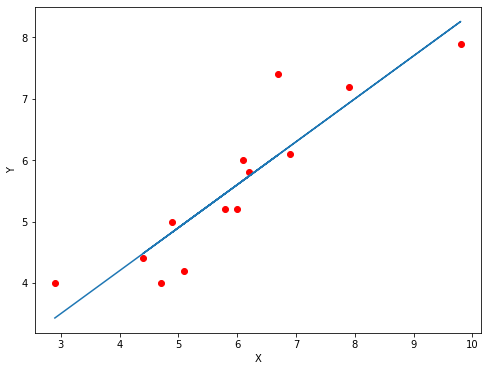

In [41]:
# Plotting the regression line
plt.figure(figsize = (8,6))
plt.scatter(X_1d, y_1d, marker='o', color='red')
plt.plot(X_1d, h_theta)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

# multi variable

In [392]:
def GD_MV(X, y, n_iters, learning_rate=0.001):
    X = X.values
    y = y.values
    # Step1: Initialize parameters (theta_0 & theta_1) with random value or simply zero. 
    # Also choose the Learning rate.
    theta = np.zeros([X.shape[1],1])
    learning_rate = learning_rate
    MSE_list = []
    for i in range(0, n_iters):
        #Step2: Use (theta_0 & theta_1) to predict the output h(x)= theta_0 + theta_1 * x.
        h_theta = X@theta

        #Step3: Calculate Cost function 𝑱(theta_0,theta_1 ).
        m = len(X)
        err = h_theta - y
        MSE = (1/(2*m))*((err.T) @ err)
        MSE_list.append(MSE[0][0])
        #Step4: Calculate the gradient.
        drev = (1/m)* (X.T @ err)
        # drev -> 4,1

        #Step5: Update the parameters (simultaneously).
        theta = theta - learning_rate*drev
        #theta -> 4,1

        #Step6: Repeat from 2 to 5 until converge to the minimum or achieve maximum iterations.
        #stop condition 1
        if (i>0) and (np.abs(MSE_list[-2] - MSE_list[-1]) < 0.1):
            break
           
        #stop condition 2
        gradient = np.linalg.norm(theta)
        if i > 0 and gradient < 0.01:
            break
        
    return theta, MSE_list

In [393]:
theta , error_list = GD_MV(X_2d, y_2d, 1000, learning_rate=0.0001)

In [394]:
h_theta = X_2d@theta

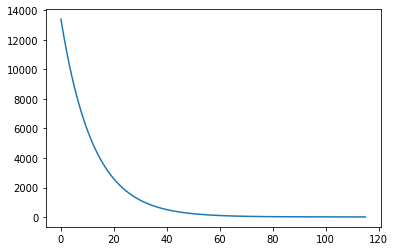

In [395]:
plt.plot(error_list);